# 트리의 앙상블

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 랜덤포레스트

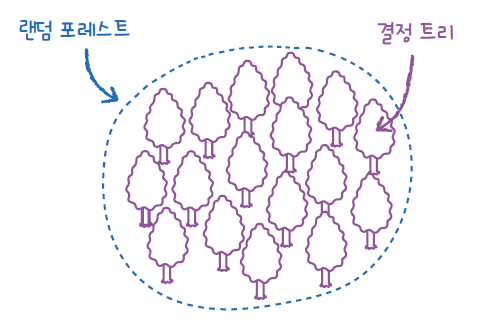
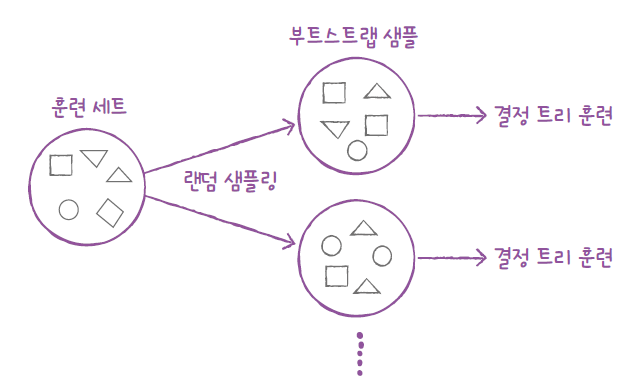
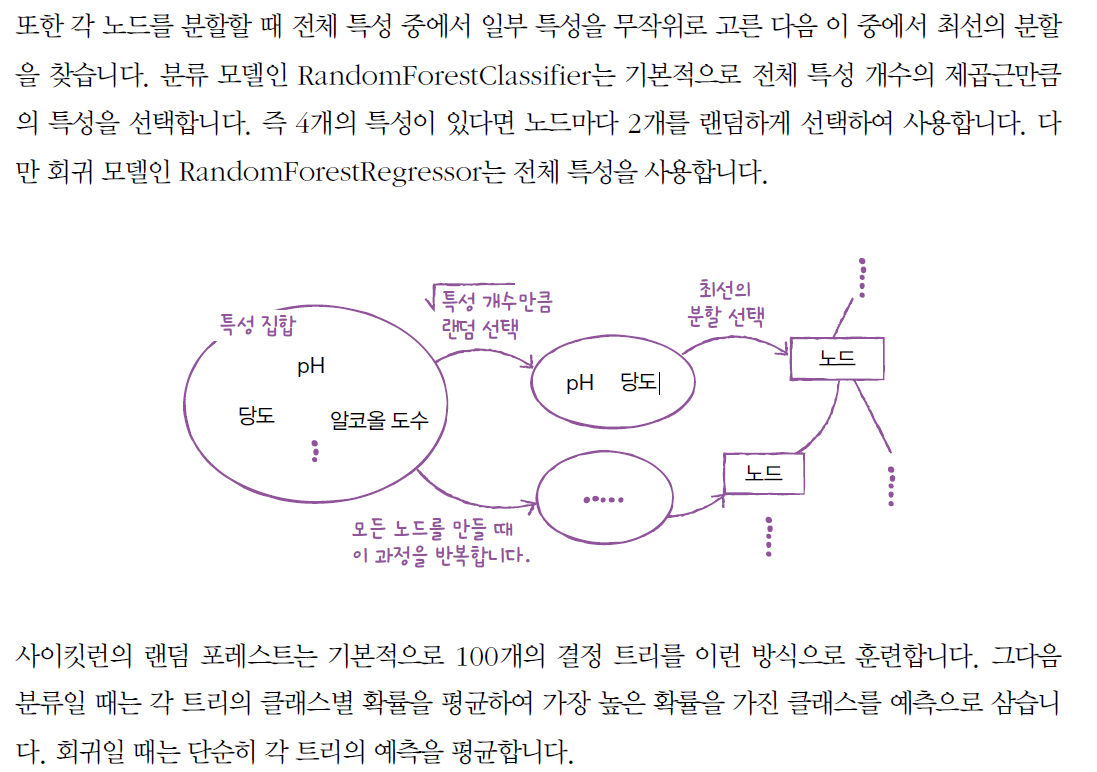

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine

alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]

In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

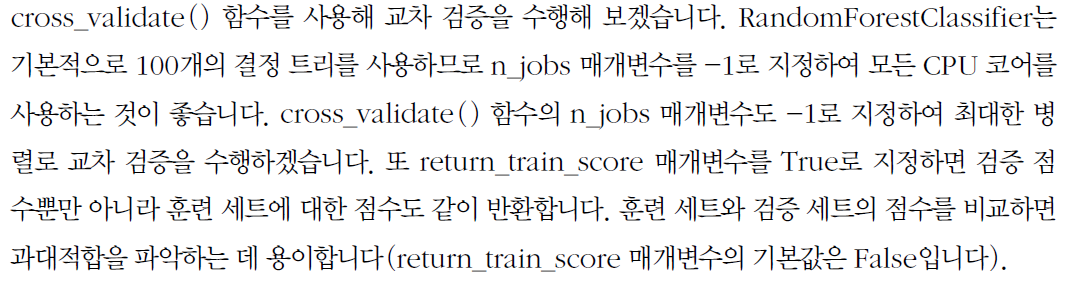

In [11]:
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [12]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


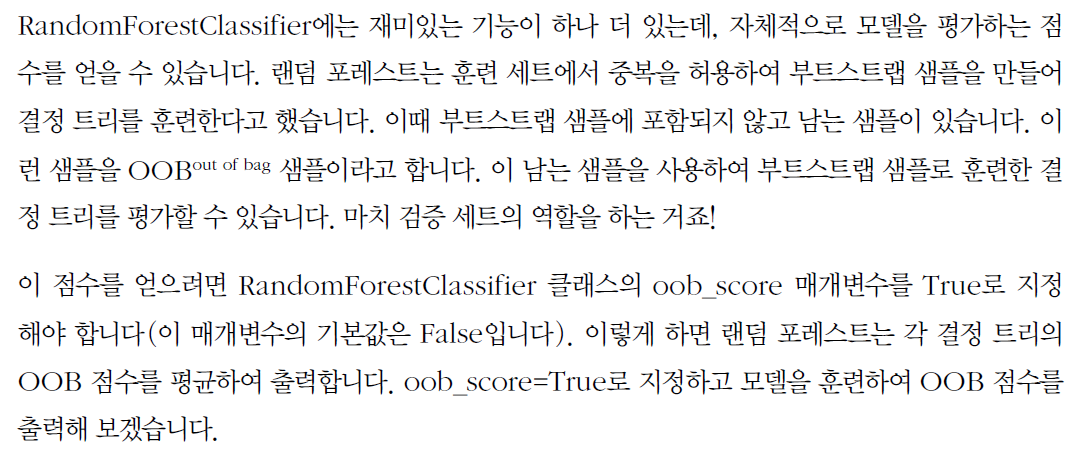

In [13]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

In [15]:
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


## 엑스트라트리 (X : skip !!!)

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [18]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅(GBM)

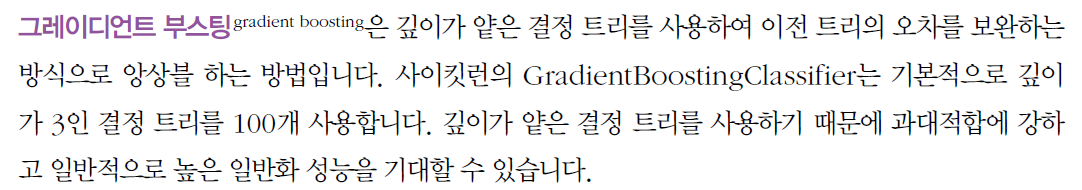

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gb = GradientBoostingClassifier(random_state=42)

In [21]:
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [22]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)

In [23]:
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [24]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


## 히스토그램 기반 부스팅 (X : skip !!!)

In [29]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행하세요.
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [30]:
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [31]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [32]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [33]:
hgb.score(test_input, test_target)

0.8723076923076923

## XGBoost (강의 교재 참고)

In [37]:
from xgboost import XGBClassifier

In [38]:
xgb = XGBClassifier(tree_method='hist', random_state=42)

In [39]:
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


## LightGBM (강의 교재 참고)

In [41]:
from lightgbm import LGBMClassifier

In [42]:
lgb = LGBMClassifier(random_state=42)

In [43]:
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
